In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
type(california)

sklearn.utils._bunch.Bunch

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)


In [6]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [9]:
y = data['Price']
X = data.drop('Price', axis=1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [11]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


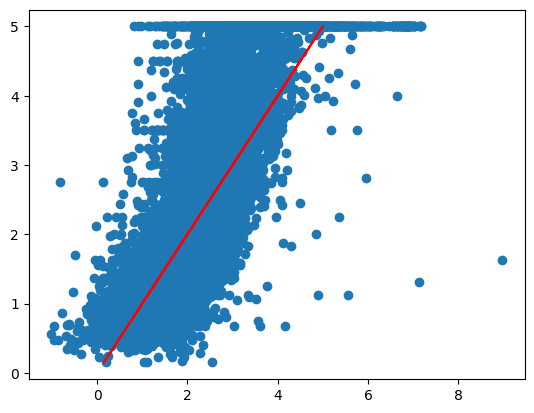

In [12]:
y_pred = model.predict(X)
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [13]:
model.score(X, y)

0.606232685199805

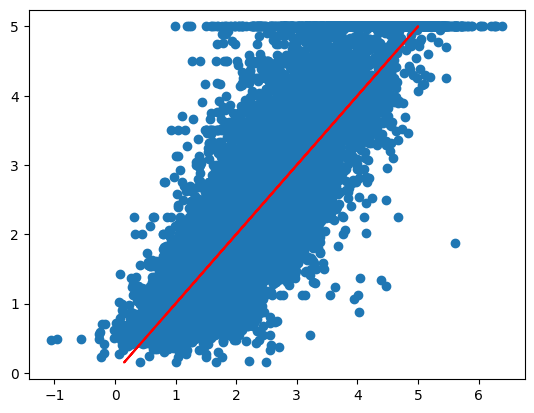

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [15]:
polynomial.score(poly, y)

0.7460745292501869

In [16]:
#1
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#разные метрики

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print("MSE:", mse)
print("R^2:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 0.5243209861846072
R^2: 0.606232685199805
RMSE: 0.7241001216576387
MAE: 0.5311643817546476


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# alpha - коэффициент регуляризации

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) с коэффицентом регуляризации 0,1: {mse_default}")

Среднеквадратичная ошибка (MSE) с коэффицентом регуляризации 0,1: 0.6142077794003159


In [18]:
model.fit_intercept=False
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_no_intercept = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) без интерсепта: {mse_no_intercept}")

Среднеквадратичная ошибка (MSE) без интерсепта: 0.6067785236891852


In [19]:
model.fit_intercept = True
model.normalize = True
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_normalized = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) с нормализацией: {mse_normalized}")

Среднеквадратичная ошибка (MSE) с нормализацией: 0.5268635567204042


In [20]:
model.normalize = False
model.n_jobs = -1
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_n_jobs = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) с измененным n_jobs: {mse_n_jobs}")

Среднеквадратичная ошибка (MSE) с измененным n_jobs: 0.5268635567204042


In [21]:
df = fetch_california_housing()
X = pd.DataFrame(data=df.data, columns=df.feature_names)
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], test_size=0.3, random_state=None)

In [ ]:
#2

# Метод опорных векторов (SVM)
#Без ядра


X_train, X_test, y_train, y_test = train_test_split(X[:100], y[:100], test_size=0.3, random_state=None)
svr = SVR(kernel='linear', C=1e3)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

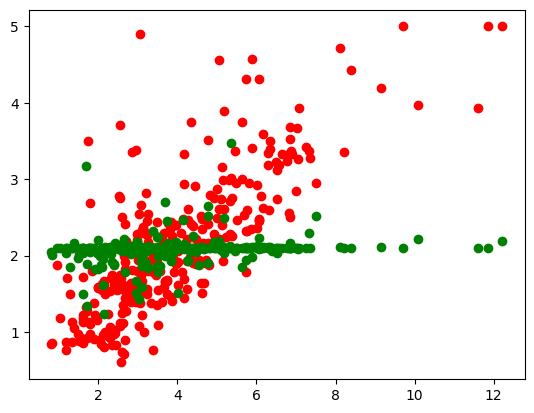

R2 score: 0.0225851024530751


In [23]:
# С гауссовым ядром

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

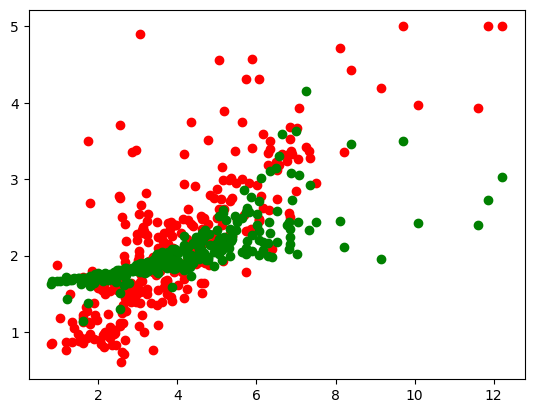

R2 score: 0.31238453049352677


In [24]:
# С полиномиальным ядром:

svr = SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

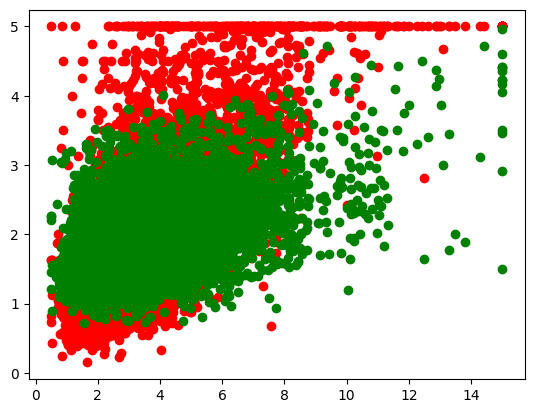

R2 score: 0.13801178658738467


In [26]:
# Метод ближайших соседей (KNN)

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

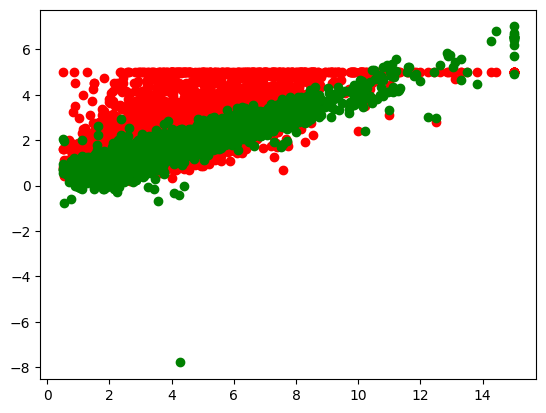

R2 score: 0.36750440945981067


In [27]:
#Многослойный перцептрон (MLP)

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

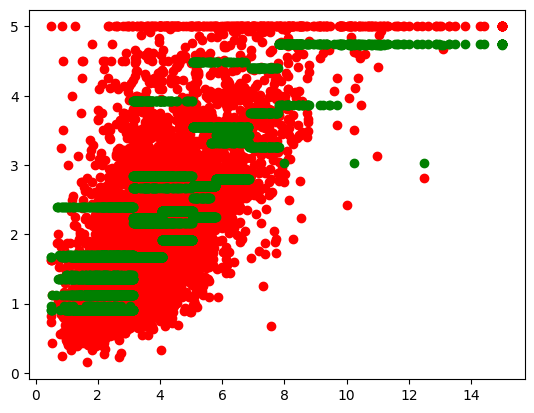

R2 score: 0.6247064469087499


In [28]:
#Дерево решений

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

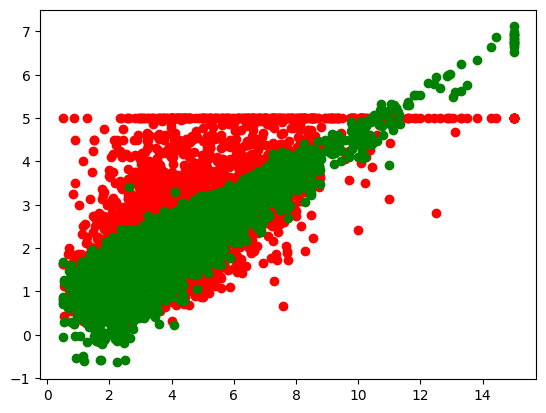

R2 score: 0.6111244080184011


In [29]:
# Гребневая регрессия (Ridge)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

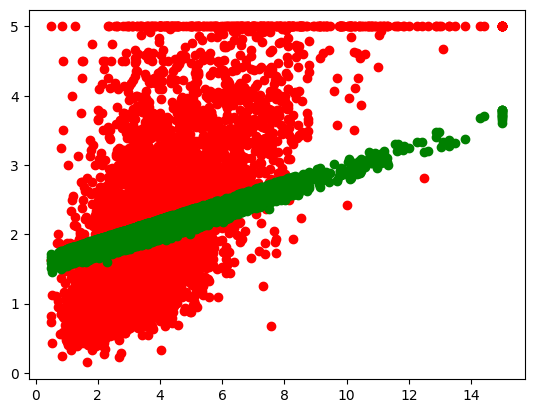

R2 score: 0.2800130722991785


In [30]:
# Регрессия Лассо

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

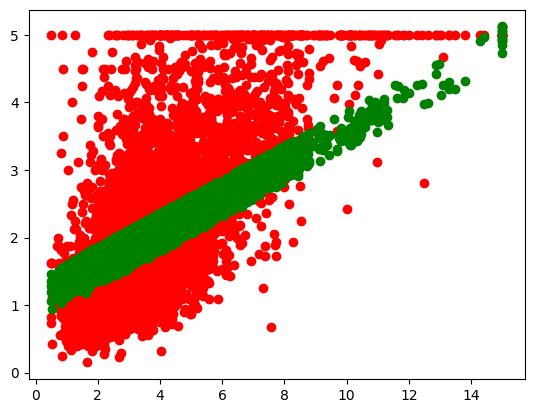

R2 score: 0.41947466551817525


In [31]:
#Регрессия ElasticNet

from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

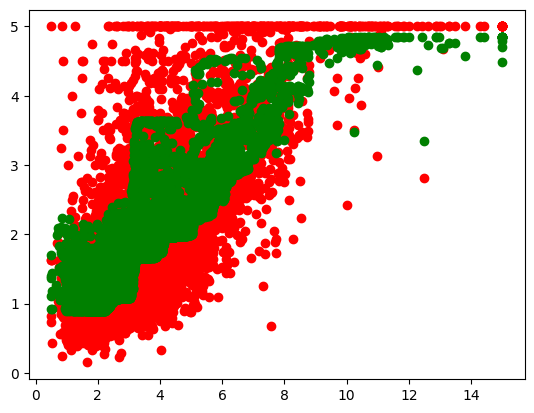

R2 score: 0.6610243854696797


In [32]:
# Случайный лес (Random Forest)

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

plt.scatter(X_test["MedInc"], y_test, color='red', label='Actual')
plt.scatter(X_test["MedInc"], y_pred, color='green', label='Predicted')
plt.show()

print('R2 score:', r2_score(y_test, y_pred))

In [37]:
#3

models = [LinearRegression(),SVR(kernel="rbf"),SVR(kernel="poly"),KNeighborsRegressor(n_neighbors=5),MLPRegressor(max_iter=1000),DecisionTreeRegressor(),RandomForestRegressor(),Ridge(),Lasso()]


def models_(dataset, models):
    df = dataset
    X = pd.DataFrame(data=df.data, columns=df.feature_names)
    Y = df.target
    X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], test_size=0.3, random_state=42)

    results = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Оценка качества модели
        mse = mean_squared_error(y_test, y_pred)
        results.append(mse)

    return results

model_ = models_(dataset=fetch_california_housing(), models=models)
for mse in model_:
    print(f"Среднеквадратичная ошибка (MSE): {mse}")

Среднеквадратичная ошибка (MSE): 0.2271004242483529
Среднеквадратичная ошибка (MSE): 0.7569109453346768
Среднеквадратичная ошибка (MSE): 0.7874690717272621
Среднеквадратичная ошибка (MSE): 0.8743420792625066
Среднеквадратичная ошибка (MSE): 0.31220876175247736
Среднеквадратичная ошибка (MSE): 0.27432367686799997
Среднеквадратичная ошибка (MSE): 0.14766163626562123
Среднеквадратичная ошибка (MSE): 0.21949322677356023
Среднеквадратичная ошибка (MSE): 0.6357206022302093


In [ ]:
#4
from sklearn.datasets import load_diabetes
model_ = models_(dataset=load_diabetes(), models=models)
for mse in model_:
    print(f"Среднеквадратичная ошибка (MSE): {mse}")